C:\Users\ANUSHA PRASHATH\AppData\Local\Temp\ipykernel_25296\3623798548.py:34: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


    Post_id Platform  Username       Movie_title  \
0     P2000  Twitter  User_513             Joker   
1     P2001     IMDB  User_687         Inception   
2     P2002  Twitter  User_222              Dune   
3     P2003   Reddit  User_601         Inception   
4     P2004  Twitter  User_693  Avengers Endgame   
..      ...      ...       ...               ...   
345   P2345  Twitter  User_466              Dune   
346   P2346  Twitter  User_292              Dune   
347   P2347   Reddit   User_53             Joker   
348   P2348     IMDB   User_49       Oppenheimer   
349   P2349     IMDB  User_487              Dune   

                                             Post_text  Likes  Rating  \
0    Just watched Joker  intense slow bad amazing g...    662     5.3   
1    Review of Inception  beautiful exciting amazin...   9621     1.5   
2    Just watched Dune  intense great slow bad exci...    721     4.0   
3    What are your thoughts on Inception  exciting ...   4541     5.3   
4    Just 

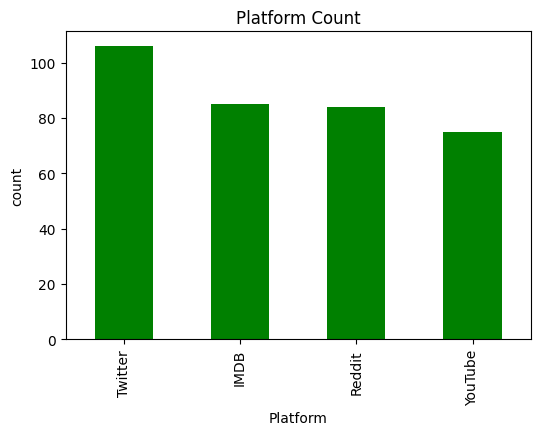

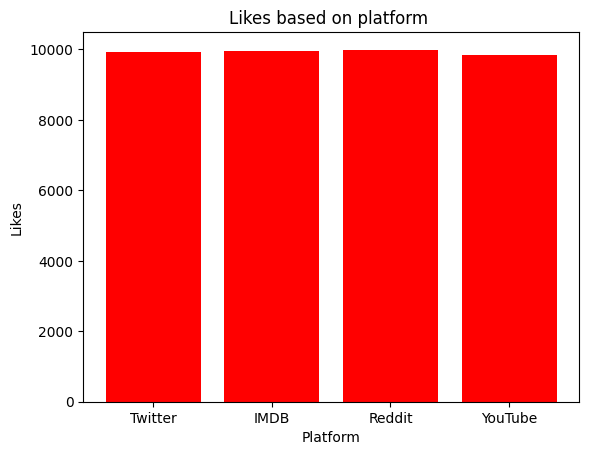

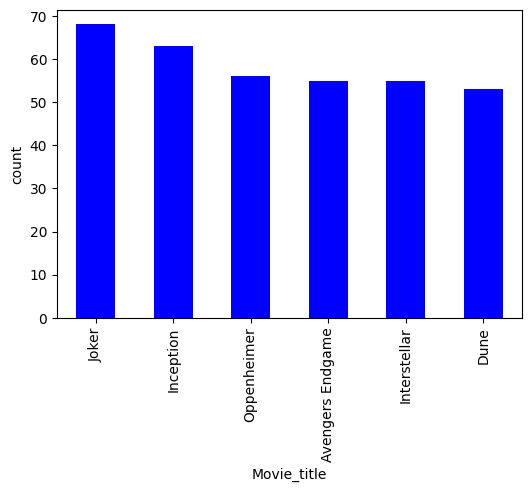

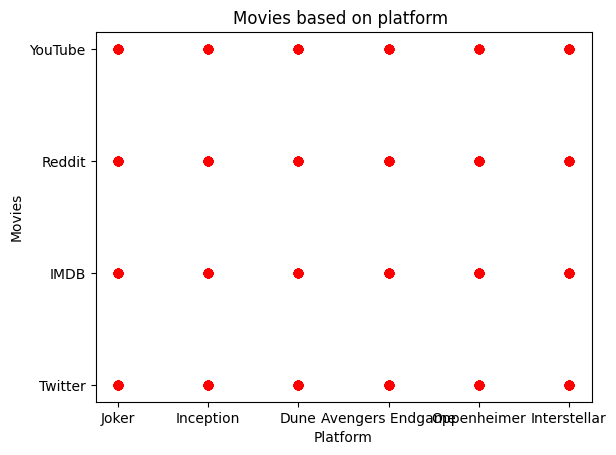

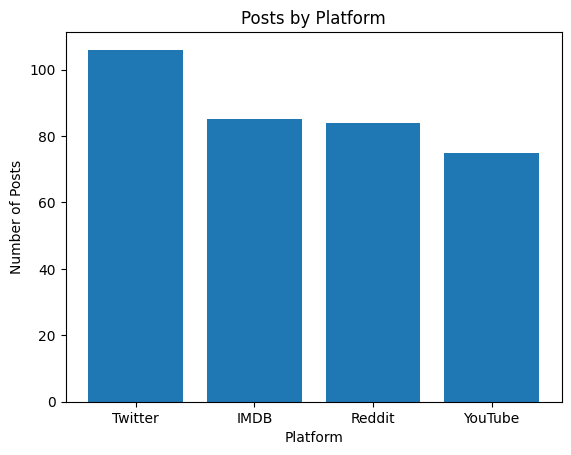

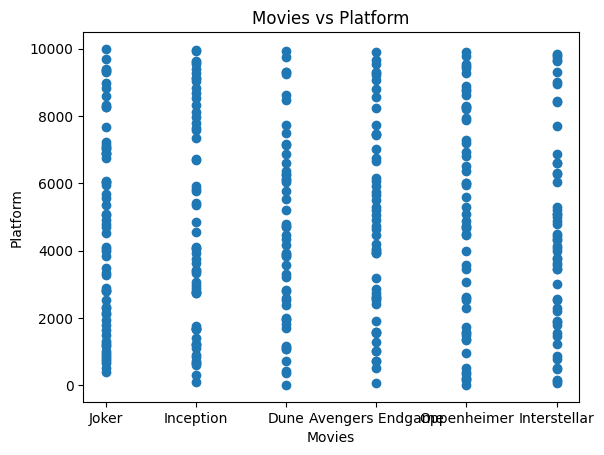

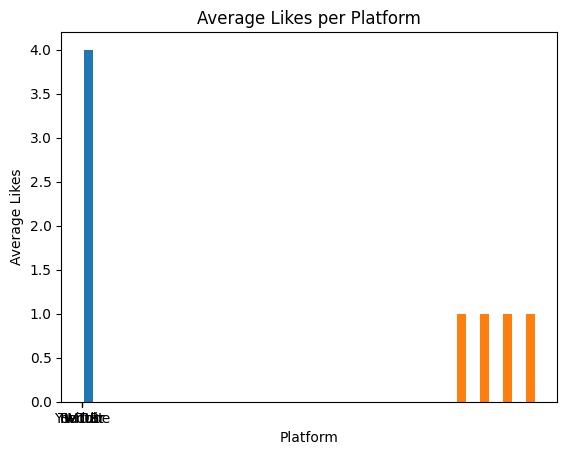

C:\Users\ANUSHA PRASHATH\AppData\Local\Temp\ipykernel_25296\3623798548.py:124: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'],dayfirst=True)


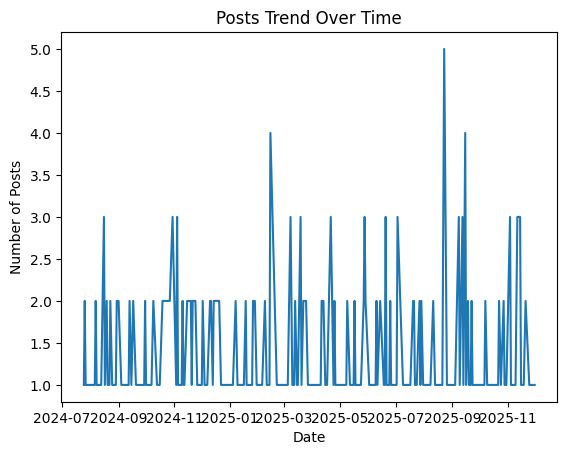

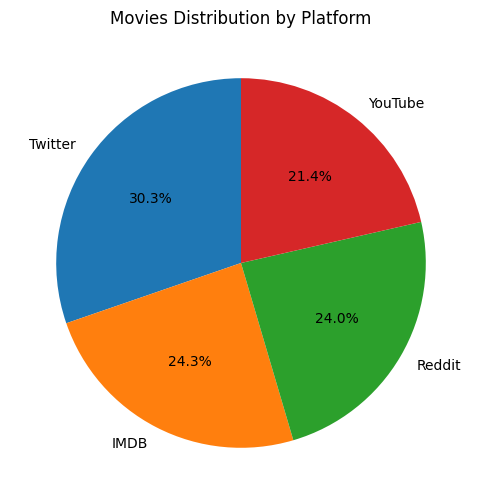

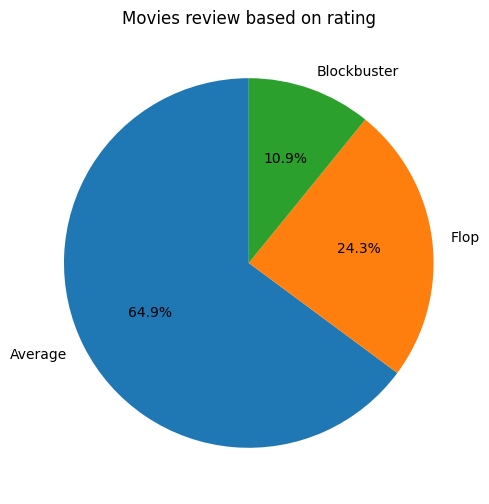

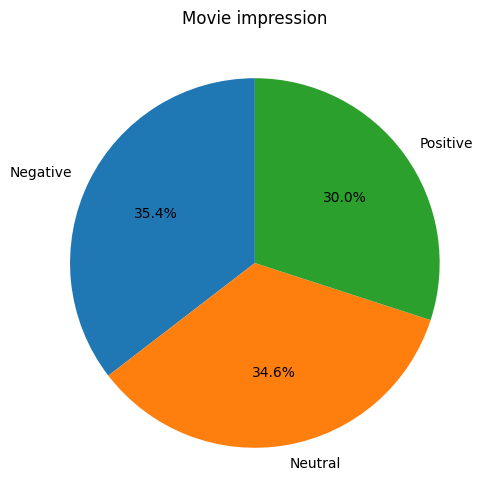

In [4]:

import pandas as pd
import re
import matplotlib.pyplot as plt


df=pd.read_csv('social_media_meaningful.csv')
df

df.isna().sum()
drop=df.dropna()
drop.isna().sum()

#df.head()
#df.tail()

numericalcolumns= df.select_dtypes(include=['int64','float64']).columns
df[numericalcolumns]=df[numericalcolumns].fillna(df[numericalcolumns].median())
#df[numericalcolumns]
#capitalizing column name 
df.columns = df.columns.str.capitalize()
#df
#Removed multiple delimiters in post_text column
df['Post_text']=df['Post_text'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x))
#df
df['Sentiment'] = df['Sentiment'].str.capitalize()
#df
df['Username'] = df['Username'].str.capitalize()
#df
# Ensure the column is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Timestamp']=df['Timestamp'].dt.strftime('%d-%m-%Y %H:%M:%S')
df['Timestamp']

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Post_day'] = df['Timestamp'].dt.day_name()
df['Day_type'] = df['Timestamp'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
df

def Rating(val):
    if val >= 8:
        return 'Blockbuster'
    elif 5 <= val < 8:
        return 'Average'
    else:
        return 'Flop'
# df['Rating_Review'] = df['Rating'].apply(Rating)
# df

# df.to_csv("socialmedia_cleaned.csv",index=False)
# df


df = pd.read_csv("socialmedia_cleaned.csv")

print(df)

#count of platform

Count = df['Platform'].value_counts()
plt.figure(figsize=(6, 4))
Count.plot(kind='bar', color='green')
plt.xlabel('Platform')
plt.ylabel('count')
plt.title('Platform Count')
plt.show()

# #Total likes based on paltform

plt.bar(df['Platform'],df['Likes'],color='red')
plt.xlabel('Platform')
plt.ylabel('Likes')
plt.title('Likes based on platform ')
plt.show()

# #count of movies

Count = df['Movie_title'].value_counts()
plt.figure(figsize=(6, 4))
Count.plot(kind='bar', color='blue')
plt.ylabel('count')
plt.show()

# # No. of movies based on platform

plt.scatter(df['Movie_title'],df['Platform'],color='red',marker='o')
plt.xlabel('Platform')
plt.ylabel('Movies')
plt.title('Movies based on platform ')
plt.show()


# # #Count of Posts by Platform

platform_counts = df['Platform'].value_counts()
plt.figure()
plt.bar(platform_counts.index, platform_counts.values)
plt.xlabel("Platform")
plt.ylabel("Number of Posts")
plt.title("Posts by Platform")
plt.show()

# #Likes Distribution



plt.figure()
plt.scatter(df['Movie_title'], df['Likes'])
plt.xlabel("Movies")
plt.ylabel("Platform")
plt.title("Movies vs Platform")
plt.show()

#Average Likes per Platform
avg_likes = df.groupby('Platform')['Likes'].mean()

plt.figure()
plt.hist([avg_likes.index, avg_likes.values], bins=20)
plt.xlabel("Platform")
plt.ylabel("Average Likes")
plt.title("Average Likes per Platform")
plt.show()

#Posts per day
df['Timestamp'] = pd.to_datetime(df['Timestamp'],dayfirst=True)
posts_per_day = df.groupby(df['Timestamp'].dt.date).size()

plt.figure()
plt.plot(posts_per_day.index, posts_per_day.values)
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.title("Posts Trend Over Time")
plt.show()

#pie chart based on Count of movies per platform

platform_counts = df['Platform'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Movies Distribution by Platform")
plt.show()

# pie chart based on movies status and likes

Movie_Status = df['Rating_Review'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(Movie_Status, labels=Movie_Status.index, autopct='%1.1f%%',startangle=90)
plt.title("Movies review based on rating")
plt.show()

# pie chart based on sentiment

Sentiment_Status = df['Sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(Sentiment_Status, labels=Sentiment_Status.index, autopct='%1.1f%%',startangle=90)
plt.title("Movie impression")
plt.show()